# Perhitungan Skor RNN-IDS

## Import All Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math

## Load All the Data

In [2]:
df_pred = pd.read_csv('./result-lstm-tcp80-hl2-seq3-do0.2-combined-00080.pcap.csv', names=['id', 'binary_error', 'b_mean', 'b_iqr', 'b_zscore', 'floatin_error', 'f_mean', 'f_iqr', 'f_zscore'])
df_truth = pd.read_csv('../NUSW-NB15_GT.csv')

In [3]:
df_pred.head()

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore
0,175.45.176.1-4657-149.171.126.18-80-tcp,0.639423,0,1,1,1171.458537,0,1,1
1,175.45.176.3-32473-149.171.126.18-80-tcp,0.657040,0,1,1,952.788321,0,1,1
2,175.45.176.0-21873-149.171.126.14-80-tcp,0.707182,0,1,1,1004.125348,0,1,1
3,175.45.176.0-49194-149.171.126.17-80-tcp,0.571429,0,0,1,809.967742,0,1,1
4,175.45.176.1-51435-149.171.126.14-80-tcp,0.567416,0,0,1,941.514286,0,1,1


In [4]:
df_truth.head()

,Start time,Last time,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.
0,1421927414,1421927416,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.
1,1421927415,1421927415,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.
2,1421927416,1421927416,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.
3,1421927417,1421927417,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.
4,1421927418,1421927418,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.


## Exploratory Data Analysis

In [5]:
df_pred[['b_iqr']].value_counts()

b_iqr
0        125384
1         21709
Name: count, dtype: int64

In [6]:
df_pred[['b_zscore']].value_counts()

b_zscore
0           107314
1            39779
Name: count, dtype: int64

In [7]:
df_truth.isnull().sum()

Start time                0
Last time                 0
Attack category           0
Attack subcategory     4097
Protocol                  0
Source IP                 0
Source Port               0
Destination IP            0
Destination Port          0
Attack Name               1
Attack Reference      50638
.                         0
dtype: int64

## Data Pre-Processing

### Convert the type of the data

In [8]:
df_truth['Source Port'] = df_truth['Source Port'].astype(int)
df_truth['Destination Port'] =df_truth['Destination Port'].astype(int)
df_truth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174347 entries, 0 to 174346
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Start time          174347 non-null  int64 
 1   Last time           174347 non-null  int64 
 2   Attack category     174347 non-null  object
 3   Attack subcategory  170250 non-null  object
 4   Protocol            174347 non-null  object
 5   Source IP           174347 non-null  object
 6   Source Port         174347 non-null  int64 
 7   Destination IP      174347 non-null  object
 8   Destination Port    174347 non-null  int64 
 9   Attack Name         174346 non-null  object
 10  Attack Reference    123709 non-null  object
 11  .                   174347 non-null  object
dtypes: int64(4), object(8)
memory usage: 16.0+ MB


In [9]:
df_truth['Source Port'] = df_truth['Source Port'].astype(str)
df_truth['Destination Port'] =df_truth['Destination Port'].astype(str)
df_truth['id'] = df_truth[['Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol']].apply("-".join, axis=1)

## Making Predictions

In [10]:
df_pred["predicted"] = np.where(df_pred["id"].isin(df_truth["id"]), 1, 0)

In [11]:
df_pred[df_pred['predicted']==1]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,predicted
11,175.45.176.0-7302-149.171.126.18-80-tcp,0.683794,0,1,1,1084.356000,0,1,1,1
44,175.45.176.1-20527-149.171.126.19-80-tcp,0.646512,0,1,1,1000.721698,0,1,1,1
45,175.45.176.2-2965-149.171.126.13-80-tcp,0.574468,0,0,1,862.075676,0,1,1,1
46,175.45.176.0-25947-149.171.126.14-80-tcp,0.533333,0,0,1,924.277778,0,1,1,1
47,175.45.176.1-50733-149.171.126.15-80-tcp,0.651786,0,1,1,932.665158,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
145498,175.45.176.0-52149-149.171.126.10-80-tcp,0.537143,0,0,1,768.255814,0,1,1,1
145507,175.45.176.0-18979-149.171.126.12-80-tcp,0.985606,1,1,1,650.271923,0,1,1,1
145515,175.45.176.0-33654-149.171.126.12-80-tcp,0.985606,1,1,1,650.271923,0,1,1,1
146216,175.45.176.3-65382-149.171.126.11-80-tcp,0.602015,0,1,1,797.563452,0,1,1,1


In [12]:
df_pred[df_pred['predicted']==0]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,predicted
0,175.45.176.1-4657-149.171.126.18-80-tcp,0.639423,0,1,1,1171.458537,0,1,1,0
1,175.45.176.3-32473-149.171.126.18-80-tcp,0.657040,0,1,1,952.788321,0,1,1,0
2,175.45.176.0-21873-149.171.126.14-80-tcp,0.707182,0,1,1,1004.125348,0,1,1,0
3,175.45.176.0-49194-149.171.126.17-80-tcp,0.571429,0,0,1,809.967742,0,1,1,0
4,175.45.176.1-51435-149.171.126.14-80-tcp,0.567416,0,0,1,941.514286,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
147088,149.171.126.15-80-175.45.176.2-20096-tcp,0.999242,1,1,1,1448.333333,0,1,1,0
147089,149.171.126.5-80-59.166.0.7-39048-tcp,0.995202,1,1,1,7040.111954,1,1,1,0
147090,59.166.0.6-22144-149.171.126.3-80-tcp,0.180258,0,0,0,194.852174,0,0,0,0
147091,149.171.126.7-80-59.166.0.6-6304-tcp,0.994949,1,1,1,6849.311600,1,1,1,0


In [13]:
df_pred

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,predicted
0,175.45.176.1-4657-149.171.126.18-80-tcp,0.639423,0,1,1,1171.458537,0,1,1,0
1,175.45.176.3-32473-149.171.126.18-80-tcp,0.657040,0,1,1,952.788321,0,1,1,0
2,175.45.176.0-21873-149.171.126.14-80-tcp,0.707182,0,1,1,1004.125348,0,1,1,0
3,175.45.176.0-49194-149.171.126.17-80-tcp,0.571429,0,0,1,809.967742,0,1,1,0
4,175.45.176.1-51435-149.171.126.14-80-tcp,0.567416,0,0,1,941.514286,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
147088,149.171.126.15-80-175.45.176.2-20096-tcp,0.999242,1,1,1,1448.333333,0,1,1,0
147089,149.171.126.5-80-59.166.0.7-39048-tcp,0.995202,1,1,1,7040.111954,1,1,1,0
147090,59.166.0.6-22144-149.171.126.3-80-tcp,0.180258,0,0,0,194.852174,0,0,0,0
147091,149.171.126.7-80-59.166.0.6-6304-tcp,0.994949,1,1,1,6849.311600,1,1,1,0


In [14]:
df_pred[['predicted']].value_counts()

predicted
0            130989
1             16104
Name: count, dtype: int64

In [15]:
df_temp = df_pred[['id', 'b_mean','b_iqr', 'b_zscore', 'f_zscore', 'f_mean','f_iqr' ]]
df_temp.to_csv('../mcnemar/ftp/pred_0.0039.csv')

## Calculating Score

In [16]:
threshold = ['b_mean', 'b_iqr', 'b_zscore']
threshold_2 = ['f_mean', 'f_iqr', 'f_zscore']

methods = ['binary', 'floating']

In [17]:
df_pred[['b_zscore']]

,b_zscore
0,1
1,1
2,1
3,1
4,1
...,...
147088,1
147089,1
147090,0
147091,1


### Detection Rate

In [18]:
from sklearn.metrics import recall_score

score = dict()
score['Detection Rate'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = recall_score(df_pred['predicted'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = recall_score(df_pred['predicted'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Floating-{i}: {acc}')  

Recall-Binary-b_mean: 0.09115747640337804
Recall-Binary-b_iqr: 0.6659836065573771
Recall-Binary-b_zscore: 0.9996274217585693
Recall-Floating-f_mean: 0.01037009438648783
Recall-Floating-f_iqr: 0.9885742672627919
Recall-Floating-f_zscore: 0.9903750620963736


### Confussion Matrix

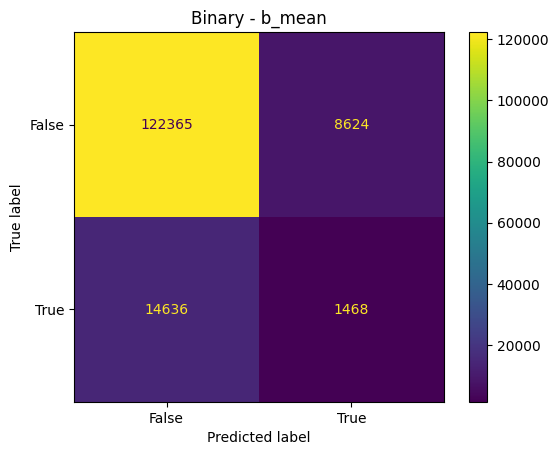

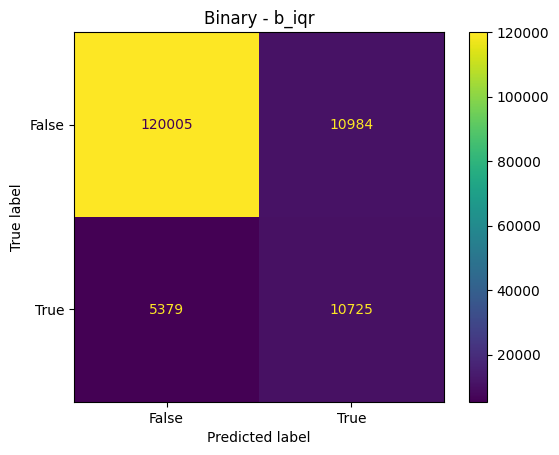

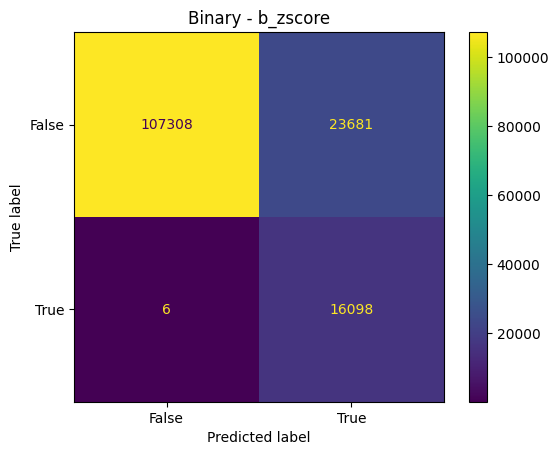

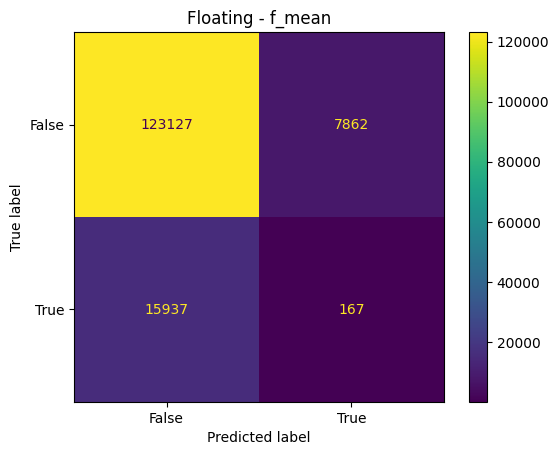

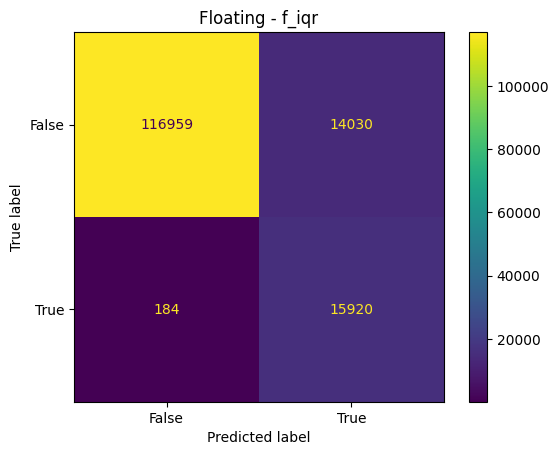

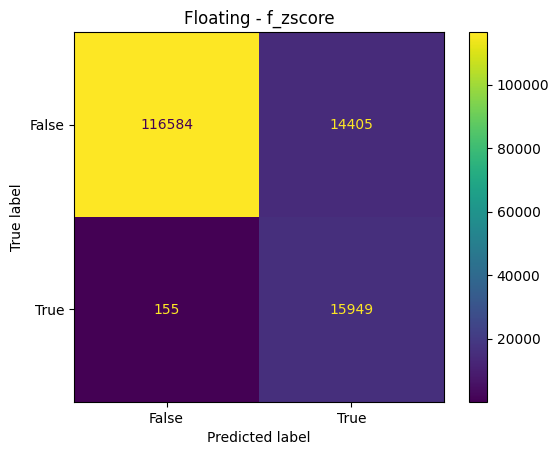

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

for method in methods:
    if method == 'binary':
        for i in threshold:
            conf_matrix = confusion_matrix(df_pred['predicted'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
            cm_display.plot()
            plt.title(f'Binary - {i.strip()}')
            plt.show()
    else:
        for i in threshold_2:
            conf_matrix = confusion_matrix(df_pred['predicted'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
            cm_display.plot()
            plt.title(f'Floating - {i.strip()}')
            plt.show()


### F2-Score

In [20]:
score['F2 Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['predicted'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Binary-{i}: {f2}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['predicted'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Floating-{i}: {f2}')

F2-Binary-b_mean: 0.09851291136522253
F2-Binary-b_iqr: 0.6226415094339622
F2-Binary-b_zscore: 0.7724938816641873
F2-Floating-f_mean: 0.011525985230174614
F2-Floating-f_iqr: 0.843524150647479
F2-Floating-f_zscore: 0.8414582673841933


### FPR Score

In [21]:
score['FPR Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['predicted'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Binary-{i}: {fpr}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['predicted'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Floating-{i}: {fpr}')

FPR-Binary-b_mean: 0.06583758941590515
FPR-Binary-b_iqr: 0.08385436945086992
FPR-Binary-b_zscore: 0.18078617288474605
FPR-Floating-f_mean: 0.060020307048683476
FPR-Floating-f_iqr: 0.10710823046209987
FPR-Floating-f_zscore: 0.10997106627274046


In [22]:
from sklearn.metrics import accuracy_score

score['Accuracy Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = accuracy_score(df_pred['predicted'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = accuracy_score(df_pred['predicted'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Floating-{i}: {acc}')  

Accuracy-Binary-b_mean: 0.8418687497025691
Accuracy-Binary-b_iqr: 0.8887574527679767
Accuracy-Binary-b_zscore: 0.8389658243424228
Accuracy-Floating-f_mean: 0.8382044012971386
Accuracy-Floating-f_iqr: 0.9033672574493687
Accuracy-Floating-f_zscore: 0.9010150041130441


In [23]:
df_score = pd.DataFrame.from_dict(score)
df_score

,Detection Rate,F2 Score,FPR Score,Accuracy Score
b_mean,0.091157,0.098513,0.065838,0.841869
b_iqr,0.665984,0.622642,0.083854,0.888757
b_zscore,0.999627,0.772494,0.180786,0.838966
f_mean,0.010370,0.011526,0.060020,0.838204
f_iqr,0.988574,0.843524,0.107108,0.903367
f_zscore,0.990375,0.841458,0.109971,0.901015


In [24]:
df_score.to_excel('score_http_0.001.xlsx')